# Solve dispersion

Given $\omega$ and information of background,

solve the wave number of the particle

frequency = 980Hz


In [1]:
import numpy as np
from taichiphysics import *
import constants as cst
def get_resonance(N, w, k , wce, gamma):
    
    
    v_para =( w - N * wce/ gamma ) /k
    return v_para

[Taichi] version 1.3.0, llvm 16.0.0git, commit 0f25b95e, osx, python 3.8.15
[I 01/02/23 21:29:02.807 1943276] [shell.py:_shell_pop_print@33] Graphical python shell detected, using wrapped sys.stdout


In [5]:
import sympy as sym
import numpy as np

wpe = sym.Symbol('wpe')
c = sym.Symbol('c')
k = sym.Symbol('k')
# w = 0.0215* wpe
# wce = 0.1 * wpe
w =sym.Symbol('w')
wce =sym.Symbol('wce')

R = 1 - (wpe**2)/(w*(w - wce))
L = 1 - (wpe**2)/(w*(w + wce)) 
P = 1 - (wpe**2)/(w**2)
S = 1/2 * (R + L )
D = 1/2 * (R - L )
eta = c * k / w 
sin = np.sin(np.deg2rad(0))
cos = np.cos(np.deg2rad(0))
rhs =  (R*L*sin**2 + P *S *(1 + cos**2) -((R*L -P*S)**2 * cos**4 + 4 *P**2*D**2 * cos**2 )**0.5)/(2 *(S*sin**2 + P*cos**2))
lhs = (k* c /w )**2
#sym.solveset(lhs - rhs,k)

In [11]:
simplify((P *S *(1) -((R*L -P*S)**2 + 4 *P**2*D**2)**0.5)/(2 *(P)))

(-w**3*((4.0*wce**2*wpe**4*(w**2 - wpe**2)**2 + (-w*(w*(w - wce) - wpe**2)*(w*(w + wce) - wpe**2) + (w**2 - wpe**2)*(1.0*w*(w - wce)*(w + wce) - 0.5*wpe**2*(w - wce) - 0.5*wpe**2*(w + wce)))**2)/(w**6*(w - wce)**2*(w + wce)**2))**0.5*(w - wce)*(w + wce) - (w**2 - wpe**2)*(-1.0*w*(w - wce)*(w + wce) + 0.5*wpe**2*(w - wce) + 0.5*wpe**2*(w + wce)))/(2*w*(w - wce)*(w + wce)*(w**2 - wpe**2))

In [9]:
from sympy import simplify
simplify(rhs)

0.5*(-w**3*((4.0*wce**2*wpe**4*(w**2 - wpe**2)**2 + 1.0*(-w*(w*(w - wce) - wpe**2)*(w*(w + wce) - wpe**2) + (w**2 - wpe**2)*(1.0*w*(w - wce)*(w + wce) - 0.5*wpe**2*(w - wce) - 0.5*wpe**2*(w + wce)))**2)/(w**6*(w - wce)**2*(w + wce)**2))**0.5*(w - wce)*(w + wce) - 2.0*(w**2 - wpe**2)*(-1.0*w*(w - wce)*(w + wce) + 0.5*wpe**2*(w - wce) + 0.5*wpe**2*(w + wce)))/(w*(w - wce)*(w + wce)*(w**2 - wpe**2))

In [8]:
(D /(S - eta**2) ).subs({k:0.523782140483476*wpe/c})

-0.999999421653441

In [5]:
lhs - rhs

2163.33153055706*c**2*k**2/wpe**2 - 593.505096137266

In [3]:
# get density
def getdensity(lat,n0):
    return n0 * (np.cos(np.deg2rad(lat)))**-4

getdensity(10,10)

10.631490712255168

In [4]:
plasma_frequency(getdensity(lat = 10,n0 = 10),m = cst.Mp, q = cst.Charge)

183944.91994280714

In [37]:
import taichi as ti

from math import pi
#from taichi.math.mathimpl import radians
# @ti.func
# def a(lat):
#     print(ti.math.radians(lat))
#     return ti.math.radians(lat)
ti.init()

v = ti.Vector([1., 2., 3.])
ti.cos(ti.math.radians(v))


[Taichi] Starting on arch=arm64


TaichiSyntaxError: Taichi functions cannot be called from Python-scope. (<string>)

In [1]:
from taichiphysics import *


[Taichi] version 1.3.0, llvm 16.0.0git, commit 0f25b95e, osx, python 3.8.15
[I 12/29/22 22:03:48.885 2136767] [shell.py:_shell_pop_print@33] Graphical python shell detected, using wrapped sys.stdout


In [5]:
ti.init()
v = 1

@ti.kernel
def triple_array():
    for i in range(2):
        print(plasma_frequency(v,v,v))
triple_array()


[Taichi] Starting on arch=arm64
3.544908
3.544908


  Using cached scipy-1.9.3-cp38-cp38-macosx_12_0_arm64.whl (28.5 MB)


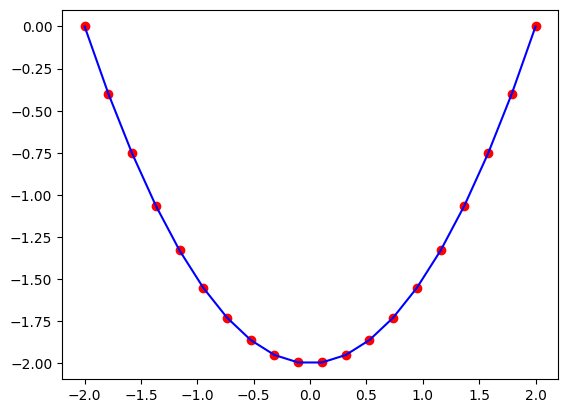

In [13]:

from scipy import integrate
import matplotlib.pyplot as plt
x = np.linspace(-2, 2, num=20)
y = x
y_int = integrate.cumulative_trapezoid(y, x, initial=0)
plt.plot(x, y_int, 'ro', x, y[0] + 0.5 * x**2, 'b-')
plt.show()

In [58]:
import taichi as ti
test = np.arange(9) + 0.875
print(test)
ti.init(default_fp=ti.f64)

lat = ti.field(dtype = ti.f64,shape = 9)
lat.from_numpy(test)

phiz = ti.field(dtype = ti.f64,shape = 9)
phiz.from_numpy(test+ 3)
@ti.func
def interp(y,xx,x,n):
    jl = -1
    ju = n
    jm = 0
    j = 0
    frac = 0.0
    
    ascnd = (xx[n - 1]>= xx[0])
    #print(ascnd)
    while ((ju - jl) > 1):
        jm = ti.floor((ju + jl)/2,dtype = ti.i32)
    
        if ((x >= xx[jm]) == ascnd):
            jl = jm
        else:
            ju = jm
    print(jm)
            
    if (x == xx[0]):
        j = 0
    elif (x == xx[n-1]):
        j = n-2
    else:
        j = jl
    print('find',j)
    if (j == -1):
        frac = -1
    elif (j == n-1):
        frac = n-1
    else:
        frac = j + (x - xx[j]) / (xx[j + 1] - xx[j])
        
    
        
    return frac
        
        
@ti.kernel
def test():
    for i in range(9):
        print(phiz[i],'lat',lat[i])
        
    print(interp(phiz,lat,4.2,9))
test()

[0.875 1.875 2.875 3.875 4.875 5.875 6.875 7.875 8.875]
[Taichi] Starting on arch=arm64
3.875000000000 lat 0.875000000000
4.875000000000 lat 1.875000000000
5.875000000000 lat 2.875000000000
6.875000000000 lat 3.875000000000
7.875000000000 lat 4.875000000000
8.875000000000 lat 5.875000000000
9.875000000000 lat 6.875000000000
10.875000000000 lat 7.875000000000
11.875000000000 lat 8.875000000000
3
find 3
3.325000000000


In [ ]:
#include "locate.hpp"

void locate(const Vector& xx, const double x, double& fracIndex){
  int ju, jm, jl, j;
  bool ascnd; 
  
  int n = xx.length(); 
  jl = -1; 
  ju = n; 
  ascnd = (xx(n - 1) >= xx(0)); 
  while (ju - jl > 1){
    jm = (ju + jl) / 2;  
    if (x >= xx(jm) == ascnd) jl = jm; 
    else ju = jm; 
  }
    
  if (x == xx(0)) j = 0; 
  else if (x == xx(n - 1)) j = n - 2; 
  else j = jl; 

  if (j == -1) fracIndex = -1; 
  else if (j == n - 1) fracIndex = n - 1; 
  else fracIndex =  j + (x - xx(j)) / (xx(j + 1) - xx(j)); 
  
} 


In [21]:
c = 3e10
m = 9.1094e-28
def ev2erg(ev):
    erg = 1.60218e-12 * ev
    return erg

def erg2p(erg,m):
    p = np.sqrt(erg*(erg + 2 * m*c**2))/ c
    return p
        
erg = ev2erg(12.7*1000)
print('erg',erg)
print(erg2p(erg, m))
p = erg2p(erg, m)

erg 2.0347686e-08
6.1262609838724984e-18


In [22]:
print(1.7e-7*(1.60218e12))

272370.6


In [23]:
from taichiphysics import *
alpha = get_pitchanlge_numpy(np.deg2rad(30),np.deg2rad(10),1)
print(alpha,np.rad2deg(alpha))

0.564455822190667 32.34093633311206


In [24]:
p_para = p * np.cos(alpha)
print(p_para)

5.175954380009605e-18


In [25]:
#p * np.sin(0.408556934)

In [26]:
gammam = m * np.sqrt(1 + p**2 /(m**2 * c**2))
gamma = np.sqrt(1 + p**2 /(m**2 * c**2))
v_para = (-1 * p_para / gammam)
w = 5092 * 2 *np.pi
wce = 45800
k = 2.38e-6
print(w - k*v_para - (wce/gamma))
print(w - wce/gamma)
print(v_para/cst.C)

498.79822425065504
-12696.842812714447
-0.18481289967738243


[Taichi] version 1.3.0, llvm 16.0.0git, commit 0f25b95e, osx, python 3.8.15
[I 01/02/23 22:40:10.743 2012028] [shell.py:_shell_pop_print@33] Graphical python shell detected, using wrapped sys.stdout
[0.00000000e+00 2.61825570e-05 5.23651141e-05 ... 2.61747023e-01
 2.61773205e-01 2.61799388e-01]
(1, 10000)


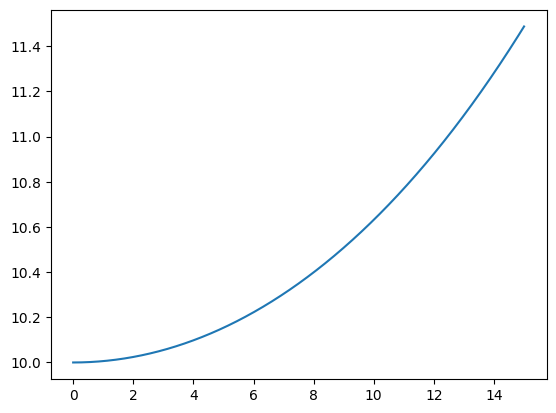

In [1]:
# get k
import matplotlib.pyplot as plt
from wave import Waves
import numpy as np
Bw0 = 3e-6 # Gauss
fwave = 980 #Hz
nlat = 10000
latmax = 15
n0 =10
L = 5
nw = 1
waves = Waves( 1, L, nlat, 0, latmax*np.pi/180, n0)
Bw_lat = np.zeros((nw, nlat)) + Bw0
waves.generate_parallel_wave(np.array([fwave *2 * np.pi]),Bw_lat)
print(waves.k.shape)
plt.plot(np.rad2deg(waves.lats),waves.ne_lats[:])
#plt.plot(np.rad2deg(waves.lats),waves.phi_z[0,:])
plt.show()

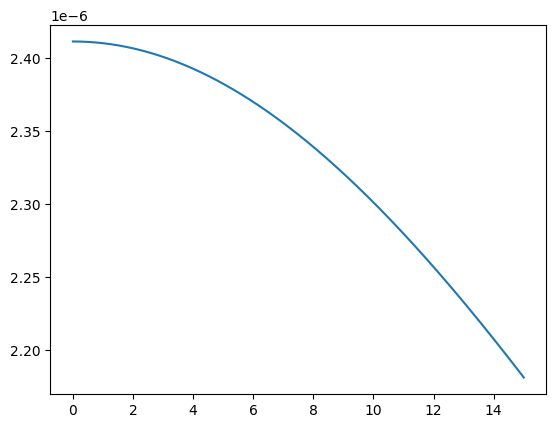

In [2]:
plt.plot(np.rad2deg(waves.lats),waves.k[0,:])
#plt.plot(np.rad2deg(waves.lats),waves.phi_z[0,:])
plt.show()

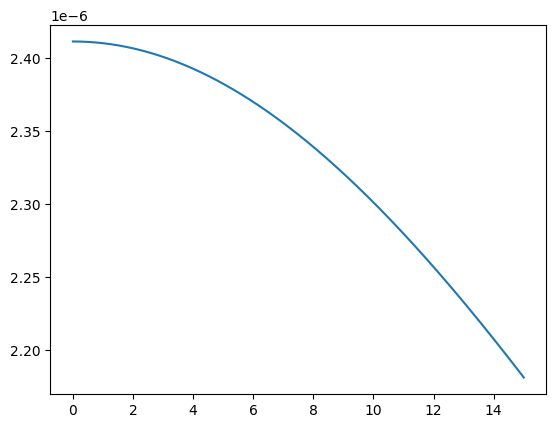

In [2]:
plt.plot(np.rad2deg(waves.lats),waves.k[0,:])
#plt.plot(np.rad2deg(waves.lats),waves.phi_z[0,:])
plt.show()

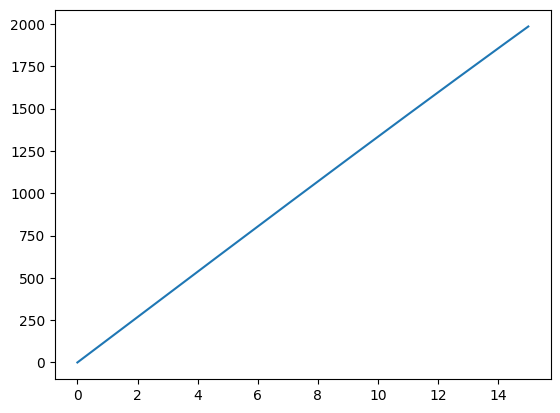

In [3]:
#plt.plot(np.rad2deg(waves.lats),waves.k[0,:])
plt.plot(np.rad2deg(waves.lats),waves.phi_z[0,:])
plt.show()

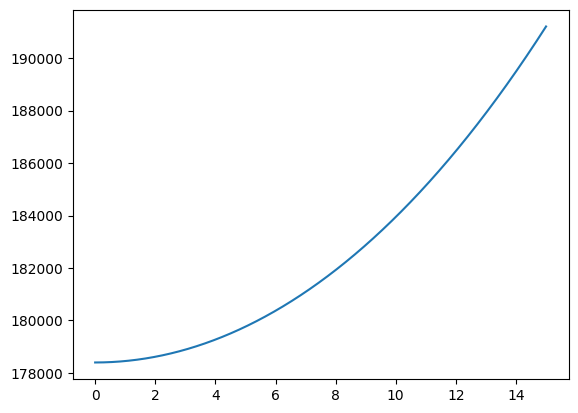

In [10]:
plt.plot(np.rad2deg(waves.lats),waves.wpes[:])
#plt.plot(np.rad2deg(waves.lats),waves.phi_z[0,:])
plt.show()

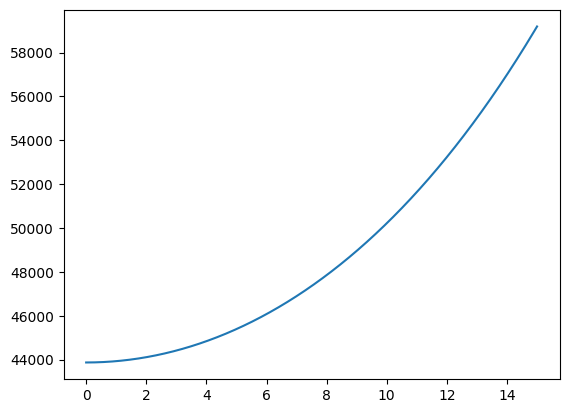

In [10]:
plt.plot(np.rad2deg(waves.lats),waves.wces[:])
#plt.plot(np.rad2deg(waves.lats),waves.phi_z[0,:])
plt.show()

In [16]:
np.rad2deg(0.0872665)

5.000002142878398

In [82]:
13160/np.pi/2

2094.4790510893426

[Taichi] version 1.3.0, llvm 16.0.0git, commit 0f25b95e, osx, python 3.8.15
[I 01/03/23 14:34:22.568 2369640] [shell.py:_shell_pop_print@33] Graphical python shell detected, using wrapped sys.stdout
wave_number 2.3013276950957483e-06
BB 0.0028572017653637613
test energy: 1.6829540975021418e-07
test energy from electron
resonance freq 15065.439567254944
test of eta 124.71513013608488
c2k2/w2 125.71513013608488


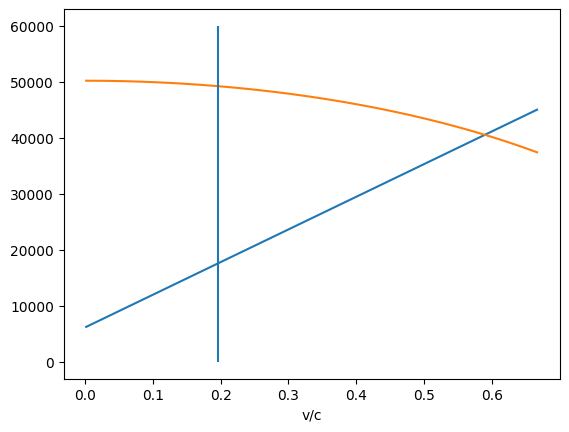

In [1]:
import numpy as np
from taichiphysics import *
import constants as cst
from wave import get_dipole_numpy
import sympy as sym
from sympy import S
import matplotlib.pyplot as plt

def solve_resonance(reslat,frequency,pitch_equator,n0,L,v):
    # get the density
    
    #n_lat = ge
    # get the wce at res_lat
    w = frequency
    res_lat = np.deg2rad(reslat)
    alpha0 = np.deg2rad(pitch_equator)
    
    n_lat = n0 * (np.cos(res_lat)**-4)
    
    wpe = np.sqrt(4 * np.pi * n_lat*cst.Charge**2/cst.Me)
    wce =  cst.Charge *get_dipole_numpy(L, res_lat, cst.B0)/(cst.Me * cst.C)
    
    
    RR = 1 - wpe**2 / ((w-wce) * w)
    k = w *np.sqrt(RR) / cst.C
    # calculate the pitch angle based on the equator
    
    alpha = get_pitchanlge_numpy(alpha0,res_lat,-1)
    
    #v = sym.Symbol('v')
    lhs = w - k * v*np.cos(alpha)
    #print(- k * v*np.cos(alpha))
    print('wave_number',k)
    rhs = wce*(1 - (v**2)/cst.C**2)**0.5
    #print(rhs)

    return lhs ,rhs

    #return alpha
v = np.linspace(5e7,2e10,1000)
result_l,result_r = solve_resonance(10,980*2*np.pi,30,10,5,v)
plt.plot(v/cst.C,result_l)
plt.plot(v/cst.C,result_r)
plt.xlabel('v/c')
plt.vlines(0.196 ,0,60000)

In [2]:
L = 5
B0 = 0.312 #Gauss
B0 / 125

0.002496

In [3]:
cst.Charge * B0/125 / (cst.Me * cst.C) 

43869.65552067096

In [48]:
-5650158489 /1e10

-0.5650158489

In [91]:
1.76e7 * 0.002857

50283.200000000004

In [35]:
import taichi as ti
ti.init()
x = ti.Vector.field(3, dtype=ti.i32, shape=16)
@ti.kernel
def fill():
    for i in x:
        for j in ti.static(range(3)):
            x[i][j] = j
            print(x[i])
fill()

[Taichi] Starting on arch=arm64
[0, 0, 0]
[0, 1, 0]
[0, 1, 2]
[0, 0, 0]
[0, 1, 0]
[0, 1, 2]
[0, 0, 0]
[0, 1, 0]
[0, 1, 2]
[0, 0, 0]
[0, 1, 0]
[0, 1, 2]
[0, 0, 0]
[0, 1, 0]
[0, 1, 2]
[0, 0, 0]
[0, 1, 0]
[0, 1, 2]
[0, 0, 0]
[0, 1, 0]
[0, 1, 2]
[0, 0, 0]
[0, 1, 0]
[0, 1, 2]
[0, 0, 0]
[0, 1, 0]
[0, 1, 2]
[0, 0, 0]
[0, 1, 0]
[0, 1, 2]
[0, 0, 0]
[0, 1, 0]
[0, 1, 2]
[0, 0, 0]
[0, 1, 0]
[0, 1, 2]
[0, 0, 0]
[0, 1, 0]
[0, 1, 2]
[0, 0, 0]
[0, 1, 0]
[0, 1, 2]
[0, 0, 0]
[0, 1, 0]
[0, 1, 2]
[0, 0, 0]
[0, 1, 0]
[0, 1, 2]


In [2]:
import numba as nb
@nb.jit()
def nb_sum(a):
    Sum = 0
    for i in range(len(a)):
        for k in range(10):
            Sum +=a[k]
        Sum += a[i]
    return Sum

# 没用numba加速的求和函数
def py_sum(a):
    Sum = 0
    for i in range(len(a)):
        for k in range(10):
            Sum +=a[k]
        Sum += a[i]
    return Sum
import numpy as np
a = np.linspace(0,100,100) # 创建一个长度为100的数组

%timeit np.sum(a) # numpy自带的求和函数
%timeit sum(a) # python自带的求和函数
%timeit nb_sum(a) # numba加速的求和函数
%timeit py_sum(a) # 没加速的求和函数

1.34 µs ± 4.99 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
3.84 µs ± 92.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


/Users/donglaima/miniforge3/envs/taichi/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/Users/donglaima/miniforge3/envs/taichi/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


1.11 µs ± 2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
76.2 µs ± 1.32 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [3]:
a = np.linspace(0,100,10**7) # 创建一个长度为1000万的数组


In [4]:
%timeit np.sum(a) # numpy自带的求和函数
%timeit sum(a) # python自带的求和函数
%timeit nb_sum(a) # numba加速的求和函数
%timeit py_sum(a) #

1.85 ms ± 8.14 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
363 ms ± 8.54 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
103 ms ± 131 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
7.63 s ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
import taichi as ti
ti.init(default_fp=ti.f64)
a_ti = ti.field(dtype = ti.f64,shape = (10**7,))
a_ti.from_numpy(a)
@ti.kernel
def ti_sum():
    Sum = 0.0
    for i in range(10**7):
        for k in range(10):
            Sum+=a_ti[k]
        Sum+=a_ti[i]
%timeit ti_sum()

[Taichi] Starting on arch=arm64
14.6 ms ± 14.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
import taichi as ti
ti.init(arch=ti.cpu)  # Alternatively, ti.init(arch=ti.cpu)

n = 128
quad_size = 1.0 / n
dt = 4e-2 / n
substeps = int(1 / 60 // dt)

gravity = ti.Vector([0, -9.8, 0])
spring_Y = 3e4
dashpot_damping = 1e4
drag_damping = 1

ball_radius = 0.3
ball_center = ti.Vector.field(3, dtype=float, shape=(1, ))
ball_center[0] = [0, 0, 0]

x = ti.Vector.field(3, dtype=float, shape=(n, n))
v = ti.Vector.field(3, dtype=float, shape=(n, n))

num_triangles = (n - 1) * (n - 1) * 2
indices = ti.field(int, shape=num_triangles * 3)
vertices = ti.Vector.field(3, dtype=float, shape=n * n)
colors = ti.Vector.field(3, dtype=float, shape=n * n)

bending_springs = False

@ti.kernel
def initialize_mass_points():
    random_offset = ti.Vector([ti.random() - 0.5, ti.random() - 0.5]) * 0.1

    for i, j in x:
        x[i, j] = [
            i * quad_size - 0.5 + random_offset[0], 0.6,
            j * quad_size - 0.5 + random_offset[1]
        ]
        v[i, j] = [0, 0, 0]


@ti.kernel
def initialize_mesh_indices():
    for i, j in ti.ndrange(n - 1, n - 1):
        quad_id = (i * (n - 1)) + j
        # 1st triangle of the square
        indices[quad_id * 6 + 0] = i * n + j
        indices[quad_id * 6 + 1] = (i + 1) * n + j
        indices[quad_id * 6 + 2] = i * n + (j + 1)
        # 2nd triangle of the square
        indices[quad_id * 6 + 3] = (i + 1) * n + j + 1
        indices[quad_id * 6 + 4] = i * n + (j + 1)
        indices[quad_id * 6 + 5] = (i + 1) * n + j

    for i, j in ti.ndrange(n, n):
        if (i // 4 + j // 4) % 2 == 0:
            colors[i * n + j] = (0.22, 0.72, 0.52)
        else:
            colors[i * n + j] = (1, 0.334, 0.52)

initialize_mesh_indices()

spring_offsets = []
if bending_springs:
    for i in range(-1, 2):
        for j in range(-1, 2):
            if (i, j) != (0, 0):
                spring_offsets.append(ti.Vector([i, j]))

else:
    for i in range(-2, 3):
        for j in range(-2, 3):
            if (i, j) != (0, 0) and abs(i) + abs(j) <= 2:
                spring_offsets.append(ti.Vector([i, j]))

@ti.kernel
def substep():
    for i in ti.grouped(x):
        v[i] += gravity * dt

    for i in ti.grouped(x):
        force = ti.Vector([0.0, 0.0, 0.0])
        for spring_offset in ti.static(spring_offsets):
            j = i + spring_offset
            if 0 <= j[0] < n and 0 <= j[1] < n:
                x_ij = x[i] - x[j]
                v_ij = v[i] - v[j]
                d = x_ij.normalized()
                current_dist = x_ij.norm()
                original_dist = quad_size * float(i - j).norm()
                # Spring force
                force += -spring_Y * d * (current_dist / original_dist - 1)
                # Dashpot damping
                force += -v_ij.dot(d) * d * dashpot_damping * quad_size

        v[i] += force * dt

    for i in ti.grouped(x):
        v[i] *= ti.exp(-drag_damping * dt)
        offset_to_center = x[i] - ball_center[0]
        if offset_to_center.norm() <= ball_radius:
            # Velocity projection
            normal = offset_to_center.normalized()
            v[i] -= min(v[i].dot(normal), 0) * normal
        x[i] += dt * v[i]

@ti.kernel
def update_vertices():
    for i, j in ti.ndrange(n, n):
        vertices[i * n + j] = x[i, j]

window = ti.ui.Window("Taichi Cloth Simulation on GGUI", (1024, 1024),
                      vsync=True)
canvas = window.get_canvas()
canvas.set_background_color((1, 1, 1))
scene = ti.ui.Scene()
camera = ti.ui.Camera()

current_t = 0.0
initialize_mass_points()

while window.running:
    if current_t > 1.5:
        # Reset
        initialize_mass_points()
        current_t = 0

    for i in range(substeps):
        substep()
        current_t += dt
    update_vertices()

    camera.position(0.0, 0.0, 3)
    camera.lookat(0.0, 0.0, 0)
    scene.set_camera(camera)

    scene.point_light(pos=(0, 1, 2), color=(1, 1, 1))
    scene.ambient_light((0.5, 0.5, 0.5))
    scene.mesh(vertices,
               indices=indices,
               per_vertex_color=colors,
               two_sided=True)

    # Draw a smaller ball to avoid visual penetration
    scene.particles(ball_center, radius=ball_radius * 0.95, color=(0.5, 0.42, 0.8))
    canvas.scene(scene)
    window.show()

[Taichi] Starting on arch=arm64
[I 01/03/23 11:57:03.714 2291469] [vulkan_device_creator.cpp:pick_physical_device@399] Found Vulkan Device 0 (Apple M1 Pro)
[I 01/03/23 11:57:03.714 2291469] [vulkan_device_creator.cpp:create_logical_device@469] Vulkan Device "Apple M1 Pro" supports Vulkan 0 version 1.1.216
[W 01/03/23 11:57:03.714 2291469] [vulkan_device_creator.cpp:create_logical_device@510] Potential non-conformant Vulkan implementation, enabling VK_KHR_portability_subset
[W 01/03/23 11:57:03.714 2291469] [vulkan_device_creator.cpp:create_logical_device@585] Taichi GPU GUI requires wide lines support
[I 01/03/23 11:57:03.813 2291469] [vulkan_device.cpp:create_swap_chain@2429] Creating suface of 2048x1972


/var/folders/kq/xpyfw9qn6p516fhr86kffkrh0000gn/T/ipykernel_44256/582720476.py:102: DeprecationWarning: Calling builtin function "min" in Taichi scope is deprecated. Please use "ti.min" instead.
  v[i] -= min(v[i].dot(normal), 0) * normal


[W 01/03/23 11:57:04.983 2291469] [vulkan_device.cpp:buffer@620] Overriding last binding
[W 01/03/23 11:57:04.996 2291469] [vulkan_device.cpp:buffer@620] Overriding last binding
